In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk

In [6]:
def chunk_preprocessing(df):
    #print(df)
    med_lst_global=[]
    med_str_global=[]
    react_lst_global=[]
    react_str_global=[]
    for ind in range(0,df.shape[0]):
        med_str=''
        med_lst=[]
        react_str=''
        react_lst=[]
        for medicine in df['patient'].iloc[ind]['drug']:
            med_lst.append(medicine['medicinalproduct'])
        for reaction in df['patient'].iloc[ind]['reaction']:
            react_lst.append(reaction['reactionmeddrapt'])
        #Remove duplicates using set
        med_lst_global.append(list(set(med_lst)))
        react_lst_global.append(list(set(react_lst)))
        med_str_global.append(' '.join(list(set(med_lst))))
        react_str_global.append(' '.join(list(set(react_lst))))
    meds=zip(med_lst_global)
    med=pd.DataFrame(meds)
    med_df=pd.DataFrame(zip(med_str_global))
    #print(med)
    reacts=zip(react_lst_global)
    react=pd.DataFrame(reacts)
    react_df=pd.DataFrame(zip(react_str_global))
    try:
        ser=df['serious']
    except:
        ser=pd.DataFrame([np.nan]*df.shape[0])
    try:
        disabling=df['seriousnessdisabling']
    except:
        disabling=pd.DataFrame([np.nan]*df.shape[0])
    try:
        death=df['seriousnessdeath']
    except:
        death=pd.DataFrame([np.nan]*df.shape[0])
    country=df['occurcountry']
    date=df['receivedate']
    df_prep=pd.concat([med,react,ser,death,disabling,country,med_df,react_df,date],axis=1,ignore_index=True)
    df_prep.rename(columns={0:'medications',1:'adverse_reactions',2:'serious',3:'death',4:'disabling',5:'country',6:'meds_str',7:'reacts_str',8:'date'},inplace=True)
    flat_med_lst = []
    #Flatten the list 
    for n, row in df_prep.iterrows():
        for item in row['medications']:
            row['flat_meds'] = item
            flat_med_lst += [row.copy()]
    flat_med_df = pd.DataFrame(flat_med_lst)
    return df_prep, flat_med_df
    

def pull_data():
    pull_ind=0
    tot_df=pd.DataFrame()
    tot_df_flat=pd.DataFrame()
    for j in range(0,1000):
        page = requests.get('https://api.fda.gov/drug/event.json?api_key=CNCu31wY1rTtVzadzO39zfi0iUoOjVva3b0Wf2x2&limit=100&skip='+str(j*100))
        dat=page.json()
        try:
            df_chunk = pd.DataFrame(dat["results"])
        except:
            return tot_df,tot_df_flat
        df,df_flattened=chunk_preprocessing(df_chunk)
        tot_df=pd.concat([tot_df,df],ignore_index=True)
        tot_df_flat=pd.concat([tot_df_flat,df_flattened],ignore_index=True)
    return tot_df,tot_df_flat

tot_df,tot_df_flat=pull_data()

In [12]:
tot_df.to_csv('25100_dat.csv')

In [4]:
tot_df_flat.to_csv('25100_flat.csv')

In [13]:
test=pd.read_csv('25100_dat.csv')

In [14]:
print(test.iloc[25])

Unnamed: 0                                         25
medications                              ['LETAIRIS']
adverse_reactions    ['Ocular hyperaemia', 'Malaise']
serious                                             2
death                                             NaN
disabling                                         NaN
country                                            US
meds_str                                     LETAIRIS
reacts_str                  Ocular hyperaemia Malaise
Name: 25, dtype: object


In [5]:
print(tot_df)

                                             medications  \
0      [ROCEPHIN, PYOSTACINE (PRISTINAMYCIN), OFLOXAC...   
1                                        [DURAGESIC-100]   
2                                               [BONIVA]   
3                                            [IBUPROFEN]   
4                                               [LYRICA]   
...                                                  ...   
25095                                 [ASPIRIN., PLAVIX]   
25096                                           [PLAVIX]   
25097                          [PARAGARD 380A, IMPLANON]   
25098      [FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)]   
25099                                          [MIRALAX]   

                                       adverse_reactions serious death  \
0               [OEDEMA PERIPHERAL, PURPURA, ARTHRALGIA]       1   NaN   
1                  [OVERDOSE, DRUG ADMINISTRATION ERROR]       1     1   
2            [Headache, Diarrhoea, Arthralgia, Vomiting] 

In [11]:
print(tot_df.shape)

(25100, 8)


In [8]:
#Countries downloaded from 'https://developers.google.com/public-data/docs/canonical/countries_csv')


In [19]:
print(tot_df.iloc[0])

medications          [OFLOXACIN, ROCEPHIN, OROKEN (CEFIXIME, UNSPEC...
adverse_reactions             [OEDEMA PERIPHERAL, PURPURA, ARTHRALGIA]
serious                                                              1
death                                                              NaN
disabling                                                          NaN
country                                                            NaN
meds_str             OFLOXACIN ROCEPHIN OROKEN (CEFIXIME, UNSPEC) P...
reacts_str                        OEDEMA PERIPHERAL PURPURA ARTHRALGIA
Name: 0, dtype: object


In [8]:
print(tot_df_flat)

                                             medications  \
0      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
1      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
2      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
3      [OROKEN (CEFIXIME, UNSPEC), OFLOXACIN, PYOSTAC...   
4                                        [DURAGESIC-100]   
...                                                  ...   
69448                                           [PLAVIX]   
69449                          [IMPLANON, PARAGARD 380A]   
69450                          [IMPLANON, PARAGARD 380A]   
69451      [FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)]   
69452                                          [MIRALAX]   

                                       adverse_reactions serious death  \
0               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
1               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA]       1   NaN   
2               [OEDEMA PERIPHERAL, ARTHRALGIA, PURPURA] 

# NLP Analysis

In [2]:
tot_df=pd.read_csv('25100_dat.csv')

In [3]:
print(np.unique(tot_df['serious']))

[1 2]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(25100, 7980)


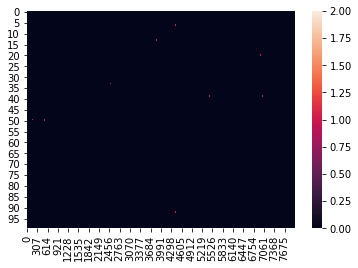

In [15]:
meds_str=tot_df['meds_str']
corpus=meds_str.values
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(X.shape)
import seaborn as sns
sns.heatmap(X.toarray()[:100,:])
plt.show()

In [27]:
# This code was adapted from https://stackoverflow.com/questions/11763613/python-list-of-ngrams-with-frequencies/11766018
meds_str=tot_df['meds_str']
print(meds_str)
corpus=meds_str.values[:1000]

c_vec = CountVectorizer(ngram_range=(2, 3))

# input to fit_transform() should be an iterable with strings
ngrams = c_vec.fit_transform(corpus)

# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# output n-grams
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    print(ng_count, ng_text)

0        OROKEN (CEFIXIME, UNSPEC) OFLOXACIN PYOSTACINE...
1                                            DURAGESIC-100
2                                                   BONIVA
3                                                IBUPROFEN
4                                                   LYRICA
                               ...                        
25095                                      ASPIRIN. PLAVIX
25096                                               PLAVIX
25097                               IMPLANON PARAGARD 380A
25098          FLUOROURACIL (FLUOROURACIL)  (FLUOROURACIL)
25099                                              MIRALAX
Name: meds_str, Length: 25100, dtype: object
32 claritin chewable tablets
32 claritin chewable
32 chewable tablets
21 low calcium
21 dianeal low calcium
21 dianeal low
13 uromitexan etoposide diphenhydramine
13 uromitexan etoposide
13 tyvaso letairis
13 etoposide diphenhydramine
12 rituximab holoxan uromitexan
12 rituximab holoxan
12 holoxan uromite

1 nexium pravastatin
1 nexium cymbalta plaquenil
1 nexium cymbalta
1 nexium 01479302 lasix
1 nexium 01479302 flomax
1 neurontin wellbutrin rebif
1 neurontin wellbutrin
1 neurontin intravenous immunoglobulin
1 neurontin intravenous
1 neurontin dexamethasone
1 neurontin abilify risperdal
1 neurontin abilify
1 neoral immunoglobulins cyclophosphamide
1 neoral immunoglobulins
1 neo mercazole augmentin
1 neo mercazole
1 nedal diaprel amn107
1 nedal diaprel
1 nebivololo lansoprazolo paracetamolo
1 nebivololo lansoprazolo
1 nda 19 516
1 nda 19
1 nasonex plavix jakafi
1 nasonex plavix
1 nasal drops with
1 nasal drops
1 nasacort allergy
1 napsylate acetaminophene toradol
1 napsylate acetaminophene
1 mylan tienam 500mg
1 mylan tienam
1 myfortic terazosabb certican
1 myfortic terazosabb
1 mycophenolate mofetil
1 multivitamins jakafi probiotics
1 multivitamins jakafi losartan
1 multivitamin tylenol compazine
1 multivitamin tylenol
1 multivitamin seroquel xr
1 multivitamin seroquel
1 multivitamin pa

1 chloride 4meq ml
1 chloride 4meq
1 chinese medicine polaramine
1 chinese medicine
1 cetuximab irinotecan unknown
1 cetuximab irinotecan
1 cetirizine levothyroxine
1 cetirizine ergenyl propavan
1 cetirizine ergenyl
1 cetirizine 00884302 aspirin
1 cetirizine 00884302
1 certican emconcor moxonidine
1 certican emconcor
1 cephalexin lyrica percocet
1 cephalexin lyrica
1 cephalexin 00145501 prednisolone
1 cephalexin 00145501
1 centrum silver 02363801
1 centrum silver
1 centrum depakote amlodipine
1 centrum depakote
1 celexa wellbutrin abilify
1 celexa wellbutrin
1 celexa oxygen depakote
1 celexa oxygen
1 celexa omniscan oxycodone
1 celexa omniscan
1 celexa 00582602 triamterene
1 celexa 00582602
1 celecox atorvastatin metgluco
1 celecox atorvastatin
1 celebrex plavix
1 celebrex lisinopril
1 celebrex cephalexin 00145501
1 celebrex cephalexin
1 celebrex aspirin
1 ceftriaxone amoxicillin clavulanate
1 cefixime unspec ofloxacin
1 cefixime unspec
1 ceclor meropenem augmentin
1 ceclor meropenem
1

In [18]:
print(X.shape)

(25100, 42461)


In [15]:
print(tot_df.iloc[25])

medications                            [LETAIRIS]
adverse_reactions    [Ocular hyperaemia, Malaise]
serious                                         2
death                                         NaN
disabling                                     NaN
country                                        US
meds_str                                 LETAIRIS
reacts_str              Ocular hyperaemia Malaise
Name: 25, dtype: object


In [17]:
test=pd.read_csv('25100_dat.csv')

In [18]:
print(test.iloc[25])

Unnamed: 0                                         25
medications                              ['LETAIRIS']
adverse_reactions    ['Ocular hyperaemia', 'Malaise']
serious                                             2
death                                             NaN
disabling                                         NaN
country                                            US
meds_str                                     LETAIRIS
reacts_str                  Ocular hyperaemia Malaise
Name: 25, dtype: object


In [19]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")

In [20]:
print(df)

                 country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8

In [21]:
pd.read_csv('https://www.iban.com/country-codes') 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [3]:
alpha_path='alpha_2_3.csv'
alpha=pd.read_csv(alpha_path,header=0)
  #alpha.rename(columns={'Alpha-2 code':'country_code'},inplace=True)
  #print(death_df)
alpha['country_code'] = alpha['country_code'].map(lambda x: x.replace('\"',''))
alpha['Alpha-3 code'] = alpha['Alpha-3 code'].map(lambda x: x.replace('\"',''))

In [4]:
print(alpha)

               Country country_code Alpha-3 code Numeric code  \
0          Afghanistan           AF          AFG          "4"   
1              Albania           AL          ALB          "8"   
2              Algeria           DZ          DZA         "12"   
3       American Samoa           AS          ASM         "16"   
4              Andorra           AD          AND         "20"   
..                 ...          ...          ...          ...   
252  Wallis and Futuna           WF          WLF        "876"   
253     Western Sahara           EH          ESH        "732"   
254              Yemen           YE          YEM        "887"   
255             Zambia           ZM          ZMB        "894"   
256           Zimbabwe           ZW          ZWE        "716"   

    Latitude (average) Longitude (average)  
0                 "33"                "65"  
1                 "41"                "20"  
2                 "28"                 "3"  
3           "-14.3333"              "-1

In [5]:
tot_df.rename(columns={'country':'country_code'},inplace=True)

In [30]:
pd.merge(tot_df.dropna(),alpha,on='country_code')
#print(tot_df['country_code'])b

,medications,adverse_reactions,serious,death,disabling,country_code,meds_str,reacts_str,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)


In [32]:
print(tot_df['country_code'].dropna())

4        US
5        US
6        US
7        US
8        US
         ..
25094    US
25095    US
25096    US
25097    US
25099    US
Name: country_code, Length: 22986, dtype: object


In [41]:
z=tot_df['country_code'].dropna()
tot_df.merge(alpha,on='country_code')

,medications,adverse_reactions,serious,death,disabling,country_code,meds_str,reacts_str,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)


In [48]:
cntr_dict={}
for ind in range(0,alpha.shape[0]):
    cntr_dict[alpha.iloc[ind]['country_code']]=alpha.iloc[ind]['Alpha-3 code']
print(cntr_dict)

{' AF': ' AFG', ' AL': ' ALB', ' DZ': ' DZA', ' AS': ' ASM', ' AD': ' AND', ' AO': ' AGO', ' AI': ' AIA', ' AQ': ' ATA', ' AG': ' ATG', ' AR': ' ARG', ' AM': ' ARM', ' AW': ' ABW', ' AU': ' AUS', ' AT': ' AUT', ' AZ': ' AZE', ' BS': ' BHS', ' BH': ' BHR', ' BD': ' BGD', ' BB': ' BRB', ' BY': ' BLR', ' BE': ' BEL', ' BZ': ' BLZ', ' BJ': ' BEN', ' BM': ' BMU', ' BT': ' BTN', ' BO': ' BOL', ' BA': ' BIH', ' BW': ' BWA', ' BV': ' BVT', ' BR': ' BRA', ' IO': ' IOT', ' BN': ' BRN', ' BG': ' BGR', ' BF': ' BFA', ' BI': ' BDI', ' KH': ' KHM', ' CM': ' CMR', ' CA': ' CAN', ' CV': ' CPV', ' KY': ' CYM', ' CF': ' CAF', ' TD': ' TCD', ' CL': ' CHL', ' CN': ' CHN', ' CX': ' CXR', ' CC': ' CCK', ' CO': ' COL', ' KM': ' COM', ' CG': ' COG', ' CD': ' COD', ' CK': ' COK', ' CR': ' CRI', ' CI': ' CIV', ' HR': ' HRV', ' CU': ' CUB', ' CY': ' CYP', ' CZ': ' CZE', ' DK': ' DNK', ' DJ': ' DJI', ' DM': ' DMA', ' DO': ' DOM', ' EC': ' ECU', ' EG': ' EGY', ' SV': ' SLV', ' GQ': ' GNQ', ' ER': ' ERI', ' EE': ' 

In [49]:
tot_df.replace({"country_code": cntr_dict})

,medications,adverse_reactions,serious,death,disabling,country_code,meds_str,reacts_str
0,"[ROCEPHIN, PYOSTACINE (PRISTINAMYCIN), OFLOXAC...","[OEDEMA PERIPHERAL, PURPURA, ARTHRALGIA]",1,NaN,NaN,NaN,ROCEPHIN PYOSTACINE (PRISTINAMYCIN) OFLOXACIN ...,OEDEMA PERIPHERAL PURPURA ARTHRALGIA
1,[DURAGESIC-100],"[OVERDOSE, DRUG ADMINISTRATION ERROR]",1,1,NaN,NaN,DURAGESIC-100,OVERDOSE DRUG ADMINISTRATION ERROR
2,[BONIVA],"[Headache, Diarrhoea, Arthralgia, Vomiting]",1,NaN,1,NaN,BONIVA,Headache Diarrhoea Arthralgia Vomiting
3,[IBUPROFEN],"[Dyspepsia, Renal impairment]",1,NaN,NaN,NaN,IBUPROFEN,Dyspepsia Renal impairment
4,[LYRICA],[Drug ineffective],2,NaN,NaN,US,LYRICA,Drug ineffective
...,...,...,...,...,...,...,...,...
25095,"[ASPIRIN., PLAVIX]","[Multiple injuries, Gastrointestinal haemorrhage]",1,NaN,NaN,US,ASPIRIN. PLAVIX,Multiple injuries Gastrointestinal haemorrhage
25096,[PLAVIX],"[Multiple injuries, Gastrointestinal haemorrhage]",1,NaN,NaN,US,PLAVIX,Multiple injuries Gastrointestinal haemorrhage
25097,"[PARAGARD 380A, IMPLANON]","[Headache, Abdominal discomfort, Pyrexia, Pelv...",2,NaN,NaN,US,PARAGARD 380A IMPLANON,Headache Abdominal discomfort Pyrexia Pelvic pain
25098,[FLUOROURACIL (FLUOROURACIL) (FLUOROURACIL)],"[Hyponatraemia, Off label use]",1,NaN,NaN,NaN,FLUOROURACIL (FLUOROURACIL) (FLUOROURACIL),Hyponatraemia Off label use
